In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 한글폰트 사용을 위해 설치
# 아래 모듈을 설치하고 불러오면 별도의 한글폰트 설정이 필요 없습니다.
# !pip install koreanize-matplotlib

#import koreanize_matplotlib


df = pd.read_csv(
    "https://raw.githubusercontent.com/corazzon/boostcourse-ds-510/master/data/online_oversea_sale_202210.csv.zip", 
    encoding="cp949")
print(df.shape)
df.head()

(2772, 5)


,국가(대륙)별,상품군별,판매유형별,시점,데이터
0,미국,컴퓨터 및 주변기기,면세점 이외,2017.1/4,1054
1,미국,컴퓨터 및 주변기기,면세점 이외,2017.2/4,946
2,미국,컴퓨터 및 주변기기,면세점 이외,2017.3/4,791
3,미국,컴퓨터 및 주변기기,면세점 이외,2017.4/4,854
4,미국,컴퓨터 및 주변기기,면세점 이외,2018.1/4,2033


# Q1. 시점 컬럼에서 연도와 분기에 대한 파생변수를 생성하고 기술통계를 구해주세요.

데이터 컬럼을 단위인 "백만"으로 변경해 주세요.
describe() 로 기술통계를 구했을 때 다음과 같은 결과가 나오도록 합니다. 아래 결과는 예시로 소숫점 자리수가 다르게 표시되더라도 값이 같다면 괜찮습니다.
전처리한 백만, 연도, 분기 컬럼이 수치형 데이터 일 때 아래와 같은 결과가 나오니 데이터가 수치 형태로 되어 있는지도 확인해 주세요!
데이터는 위에서 제공된 데이터를 사용합니다.
해당 기술통계로 알 수 있는 정보가 무엇인지도 함께 작성해 주세요!

In [59]:
df_rename = df.rename(columns={"데이터":"백만"})
df_rename.head()

,국가(대륙)별,상품군별,판매유형별,시점,백만
0,미국,컴퓨터 및 주변기기,면세점 이외,2017.1/4,1054
1,미국,컴퓨터 및 주변기기,면세점 이외,2017.2/4,946
2,미국,컴퓨터 및 주변기기,면세점 이외,2017.3/4,791
3,미국,컴퓨터 및 주변기기,면세점 이외,2017.4/4,854
4,미국,컴퓨터 및 주변기기,면세점 이외,2018.1/4,2033


In [62]:
df_rename["연도"] = df_rename["시점"].map(lambda x: int(x.split(".")[0]))

In [63]:
df_rename["분기"] = df_rename["시점"].map(lambda x: int(x.split(".")[1].split("/")[0]))
df_rename.head()

,국가(대륙)별,상품군별,판매유형별,시점,백만,분기,연도
0,미국,컴퓨터 및 주변기기,면세점 이외,2017.1/4,1054,1,2017
1,미국,컴퓨터 및 주변기기,면세점 이외,2017.2/4,946,2,2017
2,미국,컴퓨터 및 주변기기,면세점 이외,2017.3/4,791,3,2017
3,미국,컴퓨터 및 주변기기,면세점 이외,2017.4/4,854,4,2017
4,미국,컴퓨터 및 주변기기,면세점 이외,2018.1/4,2033,1,2018


In [64]:
# 데이터 값 실수. 소수점 두째자리까지 표시
pd.options.display.float_format = '{:.2f}'.format

df_rename[["백만", "연도", "분기"]].describe()

,백만,연도,분기
count,2772.00,2772.00,2772.00
mean,1613.12,2019.27,2.41
std,4273.43,1.60,1.11
min,-10003.00,2017.00,1.00
25%,41.75,2018.00,1.00
50%,291.50,2019.00,2.00
75%,1181.00,2021.00,3.00
max,47689.00,2022.00,4.00


# Q2. pivot_table을 사용하여 국가(대륙)별 연도별 판매액의 합계를 분석해 주세요.

국가(대륙)별 연도별 판매액의 합계를 구해서 어느 지역에 판매액이 많은지를 알아보겠습니다.
pivot_table 을 사용하여 다음의 결과를 구하고 시각화 해주세요!
그래프의 색상, 스타일은 자유롭게 원하는 스타일로 지정해도 됩니다.

In [65]:
df_rename.pivot_table(index="국가(대륙)별", columns="연도", values="백만", aggfunc="sum")

연도,2017,2018,2019,2020,2021,2022
국가(대륙)별,,,,,,
기타,41571,36141,40950,44438,57959,19501
대양주,18989,17520,13191,16255,16841,5044
미국,142292,156312,186617,255384,277579,103416
아세안(ASEAN),66163,76450,82930,105360,94150,38072
유럽연합(EU),31068,36826,39008,39865,32349,9019
일본,125442,178094,189330,220730,280029,131771
중국,167240,182068,210418,289446,194380,98572
중남미,10245,11669,12981,12563,8298,2629
중동,8030,8019,9325,11467,6164,1389


C:\Users\USER\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\USER\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\USER\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 48177 (\N{HANGUL SYLLABLE BAEG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\USER\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 47564 (\N{HANGUL SYLLABLE MAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\USER\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 48120 (\N{HANGUL SYLLABLE MI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\USER\anaconda3\lib\si

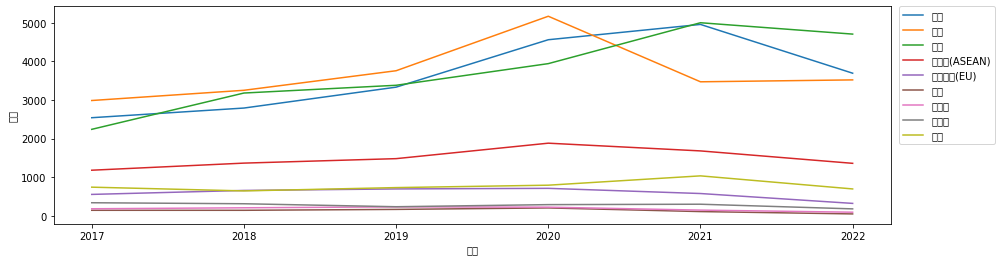

In [66]:
#라인플롯으로 그리기
plt.figure(figsize=(15,4))
sns.lineplot(data=df_rename, x="연도", y="백만", hue="국가(대륙)별", ci=None)
plt.legend(bbox_to_anchor=(1.01,1), loc=2, borderaxespad=0)# 범례를 그래프의 밖에 그리기

C:\Users\USER\anaconda3\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: Glyph 44397 (\N{HANGUL SYLLABLE GUG}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
C:\Users\USER\anaconda3\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
C:\Users\USER\anaconda3\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
C:\Users\USER\anaconda3\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: Glyph 47449 (\N{HANGUL SYLLABLE RYUG}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
C:\Users\USER\anaconda3\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
C:\Users\USER\anaconda3\lib\site-packages\seaborn\axi

C:\Users\USER\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 48177 (\N{HANGUL SYLLABLE BAEG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\USER\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 47564 (\N{HANGUL SYLLABLE MAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\USER\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44397 (\N{HANGUL SYLLABLE GUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\USER\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\USER\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\USER\anaconda3\lib\si

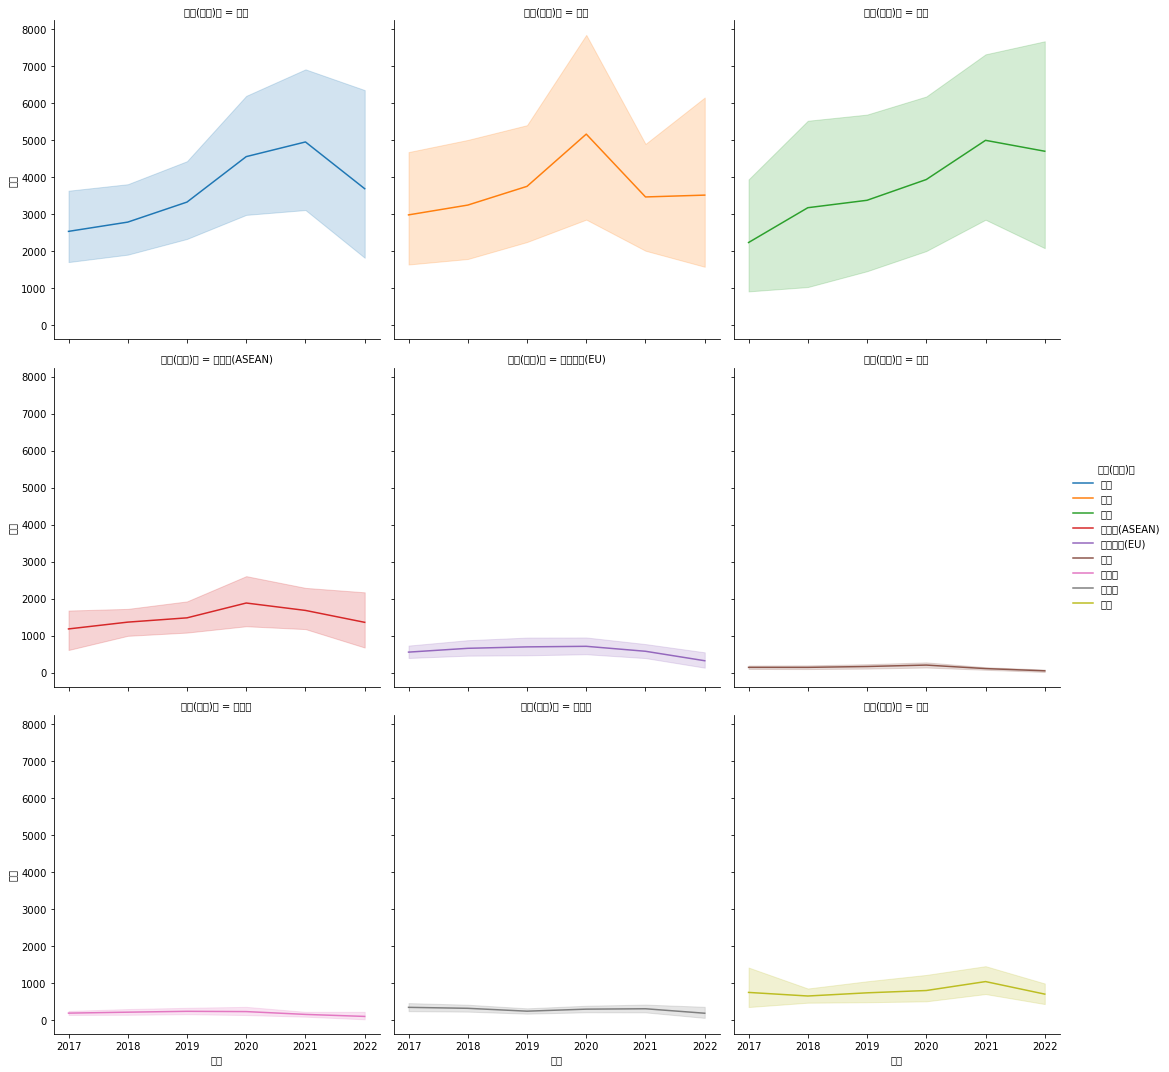

In [67]:
#서브플롯으로 그리기
sns.relplot(data=df_rename, x="연도", y="백만",
            hue="국가(대륙)별", kind="line", col="국가(대륙)별", col_wrap=3)

# Q3. groupby를 사용하여 2020년의 온라인 해외판매 상품군을 지역별 합계를 구해 분석해 주세요.

2020년은 코로나로 인해 전국민이 어려움을 겪었던 시기입니다. 또, 아마존 등의 해외 온라인 판매가 늘어난 시기이기도 합니다. 이 때, 해외 어느지역에 온라인 판매가 얼마나 되었는지를 groupby() 와 unstack()을 활용해서 합계를 구하고 분석해 주세요! 또 분석한 결과를 보고 어떤 인사이트를 얻었는지도 함께 작성해 주세요!
그래프의 색상, 스타일은 자유롭게 원하는 스타일로 지정해도 됩니다.

In [68]:
df_2020 = df_rename[df_rename["연도"] == 2020]
df_2020.groupby(["국가(대륙)별", "상품군별"])["백만"].sum().unstack()

상품군별,가전·전자·통신기기,기 타,농축수산물,사무·문구,생활용품 및 자동차용품,서 적,소프트웨어,스포츠·레저용품,아동·유아용품,음·식료품,음반·비디오·악기,의류 및 패션 관련상품,컴퓨터 및 주변기기,화장품
국가(대륙)별,,,,,,,,,,,,,,
기타,1716,3345,9,187,1464,4563,21,755,1646,1596,1410,6501,5653,15572
대양주,3825,923,1,21,1198,367,20,690,484,403,1800,3746,318,2459
미국,10103,38731,33,398,11467,9709,865,5862,4934,2706,32919,82154,6057,49446
아세안(ASEAN),12405,2620,17,3279,6432,4192,3,7423,2698,4291,16135,37992,541,7332
유럽연합(EU),3040,3907,0,25,2560,514,99,1297,1354,423,12092,5120,1910,7524
일본,404,30509,2,1526,3911,1055,27,646,1353,4699,14738,119452,193,42215
중국,1353,22736,88,403,7142,6659,4,3999,5606,4220,125078,73068,235,38855
중남미,912,625,0,3,1361,188,15,183,151,774,6421,614,362,954
중동,839,533,0,4,1060,139,17,196,121,927,3250,1776,388,2217


<AxesSubplot:xlabel='국가(대륙)별', ylabel='백만'>

C:\Users\USER\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 48120 (\N{HANGUL SYLLABLE MI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\USER\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44397 (\N{HANGUL SYLLABLE GUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\USER\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\USER\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\USER\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 48376 (\N{HANGUL SYLLABLE BON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\USER\anaconda3\lib\sit

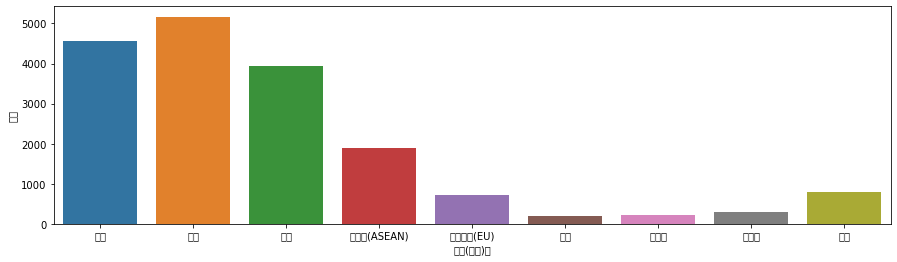

In [69]:
plt.figure(figsize=(15,4))
sns.barplot(data=df_2020, x="국가(대륙)별", y="백만", ci=None)

<AxesSubplot:xlabel='국가(대륙)별', ylabel='백만'>

C:\Users\USER\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 48120 (\N{HANGUL SYLLABLE MI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\USER\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44397 (\N{HANGUL SYLLABLE GUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\USER\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\USER\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\USER\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 48376 (\N{HANGUL SYLLABLE BON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\USER\anaconda3\lib\sit

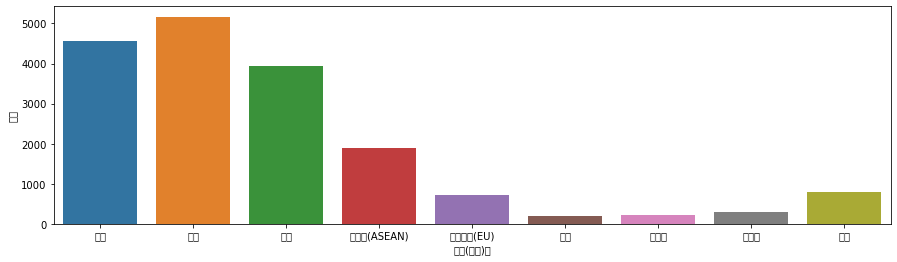

In [70]:
plt.figure(figsize=(15,4))
sns.barplot(data=df_2020, x="국가(대륙)별", y="백만", ci=None)

C:\Users\USER\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 48120 (\N{HANGUL SYLLABLE MI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\USER\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44397 (\N{HANGUL SYLLABLE GUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\USER\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\USER\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\USER\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 48376 (\N{HANGUL SYLLABLE BON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\USER\anaconda3\lib\sit

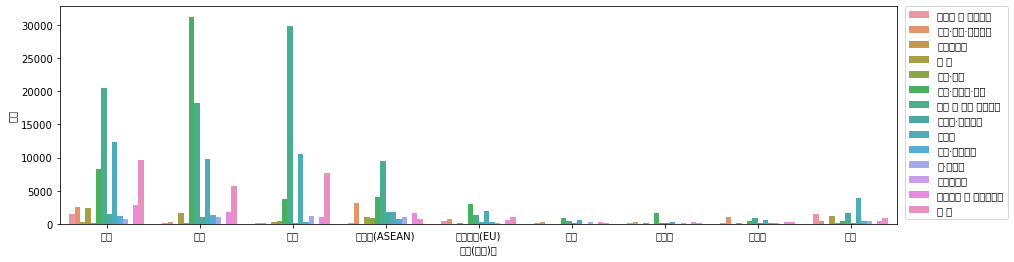

In [71]:
plt.figure(figsize=(15,4))
sns.barplot(data=df_2020, x="국가(대륙)별", y="백만", hue="상품군별", ci=None)
plt.legend(bbox_to_anchor=(1.01,1), loc=2, borderaxespad=0)# 범례를 그래프의 밖에 그리기

# Q4. 주요 판매 국가와 상품군에 대해 2021년까지의 연도별 온라인 직접 판매액 합계를 시각화 해주세요.

온라인 직접 판매액이 높은 지역은 "미국", "중국", "일본" 이며, 주요 판매 상품군은 "의류 및 패션 관련상품", "화장품", "음반·비디오·악기" 입니다. 2021년까지의 각 지역별 제품별 판매액을 시각화 해주세요!
시각화 결과의 색상이나 스타일이나 스타일은 달라도 괜찮습니다.
 

In [72]:
#국가 "미국", "중국", "일본" / 상품 "의류 및 패션 관련상품", "화장품", "음반·비디오·악기"만 가져옴.
df_contury_top3=df_rename[df_rename["국가(대륙)별"].isin(["미국", "중국", "일본"])]
df_contury_item_top3=df_contury_top3[df_contury_top3["상품군별"].isin([ "의류 및 패션 관련상품", "화장품", "음반·비디오·악기"])]
df_contury_item_top3

,국가(대륙)별,상품군별,판매유형별,시점,백만,분기,연도
110,미국,음반·비디오·악기,면세점 이외,2017.1/4,1922,1,2017
111,미국,음반·비디오·악기,면세점 이외,2017.2/4,1778,2,2017
112,미국,음반·비디오·악기,면세점 이외,2017.3/4,2281,3,2017
113,미국,음반·비디오·악기,면세점 이외,2017.4/4,2647,4,2017
114,미국,음반·비디오·악기,면세점 이외,2018.1/4,2362,1,2018
...,...,...,...,...,...,...,...
809,일본,화장품,면세점 이외,2021.2/4,18768,2,2021
810,일본,화장품,면세점 이외,2021.3/4,23380,3,2021
811,일본,화장품,면세점 이외,2021.4/4,22555,4,2021
812,일본,화장품,면세점 이외,2022.1/4,26664,1,2022


<AxesSubplot:xlabel='연도', ylabel='백만'>

C:\Users\USER\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\USER\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\USER\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 48177 (\N{HANGUL SYLLABLE BAEG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\USER\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 47564 (\N{HANGUL SYLLABLE MAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\USER\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44397 (\N{HANGUL SYLLABLE GUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\USER\anaconda3\lib\s

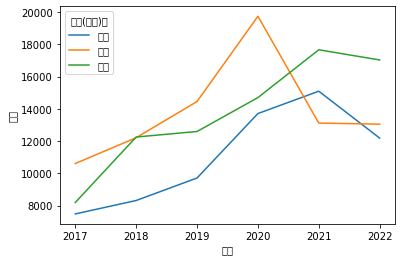

In [73]:
#국가 "미국", "중국", "일본" / 상품 "의류 및 패션 관련상품", "화장품", "음반·비디오·악기"만 가져옴.
sns.lineplot(data=df_contury_item_top3, x="연도", y="백만", hue="국가(대륙)별", ci=None)

In [36]:
top3_product = df.groupby("상품군별")["백만"].sum().sort_values(ascending=False).index[:3]
top3_product = top3_product.tolist()
top3_product

KeyError: 'Column not found: 백만'

C:\Users\USER\anaconda3\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: Glyph 44397 (\N{HANGUL SYLLABLE GUG}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
C:\Users\USER\anaconda3\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
C:\Users\USER\anaconda3\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
C:\Users\USER\anaconda3\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: Glyph 47449 (\N{HANGUL SYLLABLE RYUG}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
C:\Users\USER\anaconda3\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
C:\Users\USER\anaconda3\lib\site-packages\seaborn\axi

C:\Users\USER\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44397 (\N{HANGUL SYLLABLE GUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\USER\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\USER\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\USER\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 47449 (\N{HANGUL SYLLABLE RYUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\USER\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\USER\anaconda3\lib\

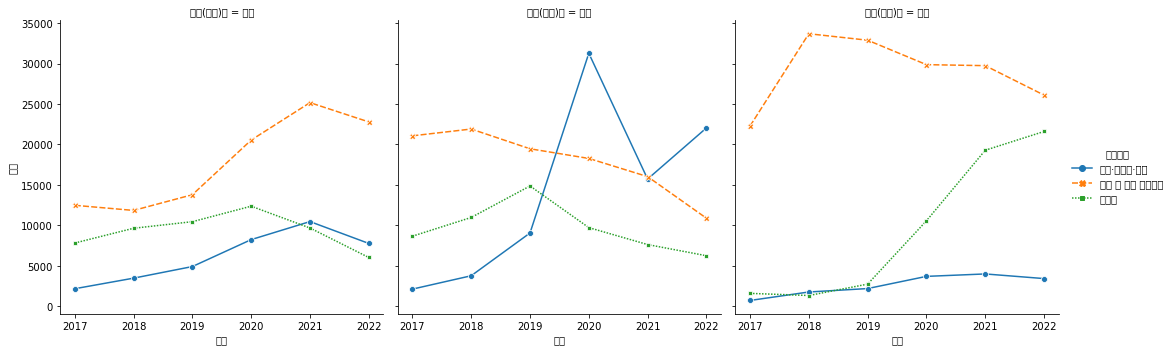

In [74]:
sns.relplot(data=df_contury_item_top3,
            x="연도",
            y="백만",
            hue="상품군별",
            kind="line",
            col="국가(대륙)별",
            col_wrap=3,
            ci=None,
            markers=True,
            dashes = True,
            style="상품군별")

# Q5. KOSIS 에 있는 데이터를 하나 정해 자유롭게 분석해 주세요!

지금까지 익힌 방법으로 다른 데이터에도 같은 방법을 통해 분석해 볼 수 있을 것입니다.
KOSIS(https://kosis.kr/) 사이트에서 관심있는 분야의 데이터를 찾고 원하는 시각화를 해주세요!
조회조건에 계, 합계 등을 미리 제거하고 다운로드 받으면 전처리를 줄일 수 있습니다.
행렬전환 기능을 사용하면 따로 melt를 진행하지 않아도 되기 때문에 이 또한 전처리를 줄일 수 있습니다.

In [77]:
df = pd.read_csv("C:/Users/USER/data/온라인쇼핑몰_판매매체별_상품군별거래액_20221127130343.csv", encoding="cp949")
df.shape

(72, 8)

In [78]:
df = df.melt(id_vars=["상품군별", "판매매체별"], var_name="시점", value_name="거래액").copy()
df

,상품군별,판매매체별,시점,거래액
0,합계,계,2022.04,16464935
1,합계,인터넷쇼핑,2022.04,4185239
2,합계,모바일쇼핑,2022.04,12279696
3,컴퓨터 및 주변기기,계,2022.04,610611
4,컴퓨터 및 주변기기,인터넷쇼핑,2022.04,316434
...,...,...,...,...
427,기타서비스,인터넷쇼핑,2022.09 p),129087
428,기타서비스,모바일쇼핑,2022.09 p),90328
429,기타,계,2022.09 p),258431
430,기타,인터넷쇼핑,2022.09 p),68850


In [79]:
df["연도"] = df["시점"].map(lambda x: int(x.split(".")[0]))
df.head()

,상품군별,판매매체별,시점,거래액,연도
0,합계,계,2022.04,16464935,2022
1,합계,인터넷쇼핑,2022.04,4185239,2022
2,합계,모바일쇼핑,2022.04,12279696,2022
3,컴퓨터 및 주변기기,계,2022.04,610611,2022
4,컴퓨터 및 주변기기,인터넷쇼핑,2022.04,316434,2022


In [80]:
df = df[df["상품군별"] != "합계"].copy()
df

,상품군별,판매매체별,시점,거래액,연도
3,컴퓨터 및 주변기기,계,2022.04,610611,2022
4,컴퓨터 및 주변기기,인터넷쇼핑,2022.04,316434,2022
5,컴퓨터 및 주변기기,모바일쇼핑,2022.04,294177,2022
6,가전·전자·통신기기,계,2022.04,1649638,2022
7,가전·전자·통신기기,인터넷쇼핑,2022.04,585435,2022
...,...,...,...,...,...
427,기타서비스,인터넷쇼핑,2022.09 p),129087,2022
428,기타서비스,모바일쇼핑,2022.09 p),90328,2022
429,기타,계,2022.09 p),258431,2022
430,기타,인터넷쇼핑,2022.09 p),68850,2022


<AxesSubplot:ylabel='상품군별'>

C:\Users\USER\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\USER\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 47924 (\N{HANGUL SYLLABLE MU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\USER\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 47928 (\N{HANGUL SYLLABLE MUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\USER\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\USER\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50528 (\N{HANGUL SYLLABLE AE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\USER\anaconda3\lib\site-p

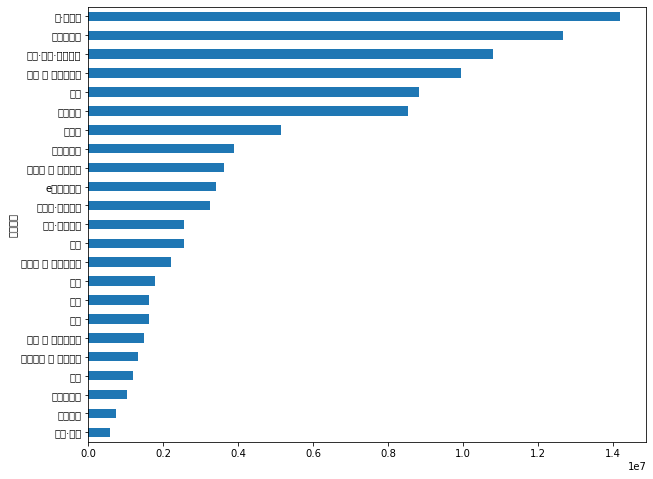

In [98]:
df_sub = df[df["판매매체별"] != "계"]
df_sub.groupby("상품군별")["거래액"].sum().sort_values(ascending=True).plot.barh(figsize=(10, 8))

In [82]:
result = df_sub.pivot_table(index=["상품군별"], columns="연도", values="거래액", aggfunc="sum")
result

연도,2022
상품군별,
e쿠폰서비스,3406700
가구,2540801
가방,1778287
가전·전자·통신기기,10800117
기타,1624079
기타서비스,1036438
농축수산물,3884609
문화 및 레저서비스,1472053
사무·문구,575046


C:\Users\USER\anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 53216 (\N{HANGUL SYLLABLE KU}) missing from current font.
  fig.canvas.draw()
C:\Users\USER\anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 54256 (\N{HANGUL SYLLABLE PON}) missing from current font.
  fig.canvas.draw()
C:\Users\USER\anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 49436 (\N{HANGUL SYLLABLE SEO}) missing from current font.
  fig.canvas.draw()
C:\Users\USER\anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from current font.
  fig.canvas.draw()
C:\Users\USER\anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from current font.
  fig.canvas.draw()
C:\Users\USER\anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  fig.canvas.draw()
C:\Users\USER\anaconda3\lib\site-pack

<AxesSubplot:xlabel='연도', ylabel='상품군별'>

C:\Users\USER\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\USER\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\USER\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 53216 (\N{HANGUL SYLLABLE KU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\USER\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 54256 (\N{HANGUL SYLLABLE PON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\USER\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49436 (\N{HANGUL SYLLABLE SEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\USER\anaconda3\lib\sit

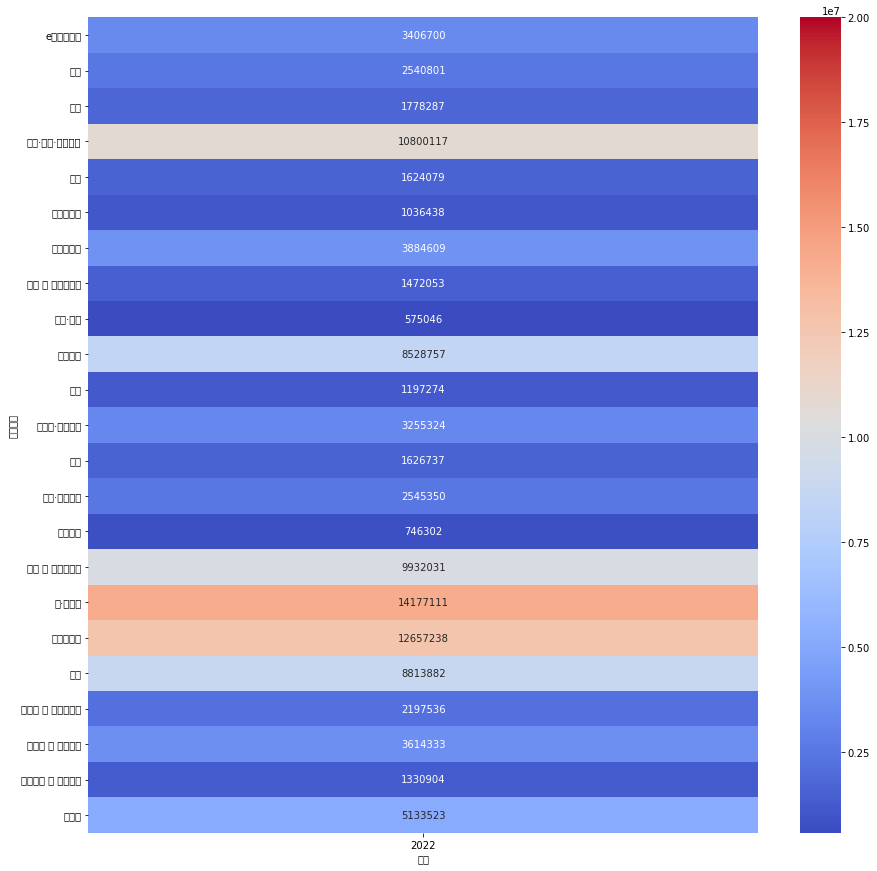

In [83]:
plt.figure(figsize=(15, 15))
sns.heatmap(result, cmap="coolwarm", annot=True, fmt=".0f", vmax=20000000)

C:\Users\USER\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\USER\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\USER\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44144 (\N{HANGUL SYLLABLE GEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\USER\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 47000 (\N{HANGUL SYLLABLE RAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\USER\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50529 (\N{HANGUL SYLLABLE AEG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\USER\anaconda3\lib\si

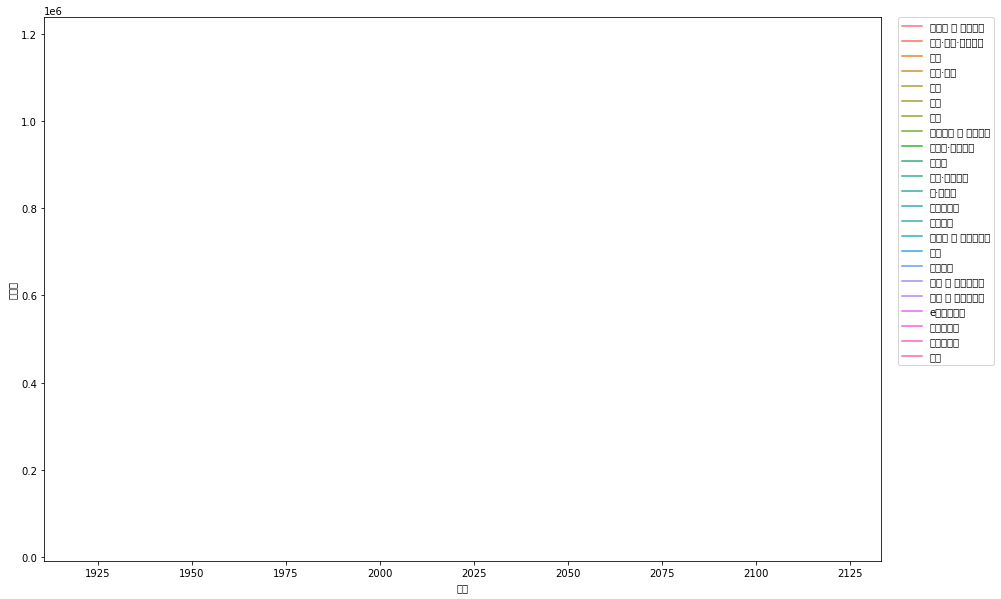

In [84]:
# 연도별 거래액을 그리고 "상품군별"로 다른 색상으로 표현하기
plt.figure(figsize=(15, 10))
sns.lineplot(data=df_sub, x="연도", y="거래액", hue="상품군별", ci=None)
sns.color_palette("Paired")

# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

In [85]:
top10 = df_sub.groupby("상품군별")["거래액"].sum().sort_values(ascending=False)[:10].index
top10 = top10.tolist()
top10

['음·식료품',
 '음식서비스',
 '가전·전자·통신기기',
 '여행 및 교통서비스',
 '의복',
 '생활용품',
 '화장품',
 '농축수산물',
 '컴퓨터 및 주변기기',
 'e쿠폰서비스']

In [86]:
df_top10 = df_sub[df_sub["상품군별"].isin(top10)].copy()
df_top10.head()

,상품군별,판매매체별,시점,거래액,연도
4,컴퓨터 및 주변기기,인터넷쇼핑,2022.04,316434,2022
5,컴퓨터 및 주변기기,모바일쇼핑,2022.04,294177,2022
7,가전·전자·통신기기,인터넷쇼핑,2022.04,585435,2022
8,가전·전자·통신기기,모바일쇼핑,2022.04,1064203,2022
16,의복,인터넷쇼핑,2022.04,467191,2022


C:\Users\USER\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\USER\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\USER\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44144 (\N{HANGUL SYLLABLE GEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\USER\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 47000 (\N{HANGUL SYLLABLE RAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\USER\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50529 (\N{HANGUL SYLLABLE AEG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\USER\anaconda3\lib\si

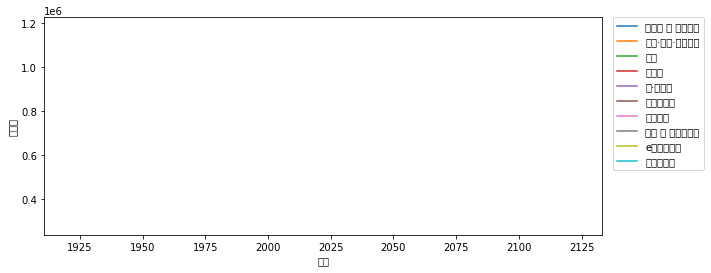

In [95]:
# 연도별 거래액을 그리고 "상품군별"로 다른 색상으로 표현하기
plt.figure(figsize=(10, 4))
sns.lineplot(data=df_top10, x="연도", y="거래액", hue="상품군별", ci=None)
sns.color_palette("Paired")

# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)